# **1- Import libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [28]:
# show all columns
pd.pandas.set_option('display.max_columns', None)

# **2- Load Data**

In [29]:
df = pd.read_csv('Foodpanda Analysis Dataset.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [31]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


# **3- Analyzing Data:**

# 3.1- Data Types Conversion

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [33]:
column = ['signup_date','order_date', 'last_order_date', 'rating_date' ]

for col in column:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    

# 3.2 Finding missing values

In [34]:
df.isnull().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

# **4- Cleaning Data:**

In [35]:
# Dropping unnecessary columns
df = df.drop(['order_date' , 'order_frequency','last_order_date', 'rating_date', 'signup_date', 'order_id' ], axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   restaurant_name  6000 non-null   object 
 5   dish_name        6000 non-null   object 
 6   category         6000 non-null   object 
 7   quantity         6000 non-null   int64  
 8   price            6000 non-null   float64
 9   payment_method   6000 non-null   object 
 10  loyalty_points   6000 non-null   int64  
 11  churned          6000 non-null   object 
 12  rating           6000 non-null   int64  
 13  delivery_status  6000 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 656.4+ KB


In [37]:
df['city'].unique()

array(['Peshawar', 'Multan', 'Lahore', 'Karachi', 'Islamabad'],
      dtype=object)

This dataset is a **Foodpanda Analysis Dataset** with **6000 rows and 20 columns**.

### What’s inside:

* **Customer info:** `customer_id`, `gender`, `age`, `city`, `signup_date`
* **Order info:** `order_id`, `order_date`, `restaurant_name`, `dish_name`, `category`, `quantity`, `price`, `payment_method`
* **Behavior info:** `order_frequency`, `last_order_date`, `loyalty_points`, `churned` (Active/Inactive), `rating`, `rating_date`, `delivery_status`

---

### Possible Tasks we can perform:

1. **Customer Analysis**

   * Which **city** has the most customers?
   * Order behavior by gender and age group.
   * Average Order Price by City.

2. **Order Analysis**

  * Top 10 Most Ordered Dishes by Restaurant
   * Popular **food categories** (Italian, Dessert, etc.).
   

3. **Financial Insights**

   * Total revenue and average order value.
   * Top cities and restaurants by revenue.

4. **Payment & Delivery**

   * Most common **payment method**.
   * Delivery status distribution (Cancelled, Delayed, On-Time).

5. **Customer Loyalty**

   * Loyalty points vs churn.
   * Profile of high-frequency customers.

6. **Ratings Analysis**

   * Average customer ratings by city/restaurant.
   * Which cities/customers are more satisfied.

---



In [38]:
df['delivery_status'].value_counts()

delivery_status
Delivered    2060
Delayed      1972
Cancelled    1968
Name: count, dtype: int64

df.duplicated(axis=0).sum()

### **5- Visualization:**

In [39]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'restaurant_name', 'dish_name',
       'category', 'quantity', 'price', 'payment_method', 'loyalty_points',
       'churned', 'rating', 'delivery_status'],
      dtype='object')

# **Customer Analysis**

In [40]:
df['city'].value_counts()

city
Multan       1256
Lahore       1217
Peshawar     1195
Islamabad    1187
Karachi      1145
Name: count, dtype: int64

In [41]:
# Which city has the most customers?
city_count = df['city'].value_counts().reset_index()
fig = px.bar(city_count, x = df['city'].value_counts().index,
              y = df['city'].value_counts().values,
              title='Which City has the most customers', color='city', 
              labels={'x':'City', 'y':'Number of Customers'})
fig.show()


In [42]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'restaurant_name', 'dish_name',
       'category', 'quantity', 'price', 'payment_method', 'loyalty_points',
       'churned', 'rating', 'delivery_status'],
      dtype='object')

In [43]:
data = df.groupby(['gender', 'age'])['category'].count().reset_index()
data.columns = ['gender', 'age', 'count']



In [44]:
#Order behavior by gender and age group.
fig = px.bar(data,
              x='gender',
              y='count',
              color='age',
              barmode='group',
              title="Orders by Gender and Age")
fig.show()

In [45]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'restaurant_name', 'dish_name',
       'category', 'quantity', 'price', 'payment_method', 'loyalty_points',
       'churned', 'rating', 'delivery_status'],
      dtype='object')

In [46]:
# 'Average Order Price by City'
data = df.groupby(['city']) ['price'].mean().sort_values(ascending=False)
data

city
Peshawar     824.361054
Multan       803.346871
Islamabad    795.089174
Lahore       793.004503
Karachi      786.180629
Name: price, dtype: float64

In [47]:
fig  = px.bar(data,
              x = data.index,
              y = data.values,
              title='Average Order Price by City',
              labels={'x':'City', 'y':'Average Order Price'},
              color=data.values)
fig.show()

# **Order Analysis**

In [48]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'restaurant_name', 'dish_name',
       'category', 'quantity', 'price', 'payment_method', 'loyalty_points',
       'churned', 'rating', 'delivery_status'],
      dtype='object')

In [49]:
# Top 10 Most Ordered Dishes by Restaurant
result = df.groupby(['restaurant_name', 'dish_name']).size().reset_index(name='order_count')
result
 
fig = px.bar(result.sort_values(by='order_count', ascending=False).head(10),
             x='dish_name',
             y='order_count',
             color='restaurant_name',
             title='Top 10 Most Ordered Dishes by Restaurant',
             labels={'dish_name':'Dish Name', 'order_count':'Number of Orders'})
fig.show()


In [50]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'restaurant_name', 'dish_name',
       'category', 'quantity', 'price', 'payment_method', 'loyalty_points',
       'churned', 'rating', 'delivery_status'],
      dtype='object')

In [51]:
# Popular food categories (Italian, Dessert, etc.)
data = df.groupby('category').size().sort_values()
data

category
Dessert        1133
Chinese        1198
Continental    1211
Fast Food      1222
Italian        1236
dtype: int64

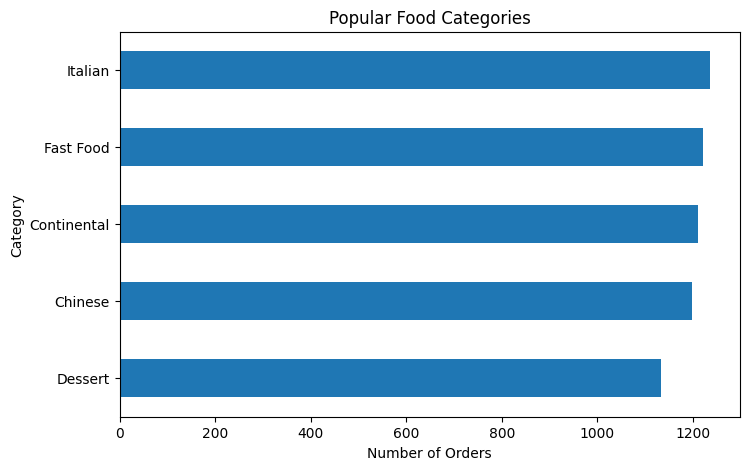

In [53]:
# Popular food categories (Italian, Dessert, etc.)
data = df.groupby('category').size().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
data.plot(kind='barh')
plt.title("Popular Food Categories")
plt.xlabel("Number of Orders")
plt.ylabel("Category")
plt.gca().invert_yaxis()  # Sabse popular category upar dikhane ke liye
plt.show()


# **Financial Insights**

In [56]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'restaurant_name', 'dish_name',
       'category', 'quantity', 'price', 'payment_method', 'loyalty_points',
       'churned', 'rating', 'delivery_status'],
      dtype='object')

In [ ]:
# Total revenue and average order value.
# Calculate values
total_revenue = df['price'].sum().round(2)
avg_order_value = df['price'].mean().round(2)

# Data for plot
plot_data = pd.DataFrame({
    "Metric": ["Total Revenue", "Average Order Value"],
    "Value": [total_revenue, avg_order_value]
})

# Plot with color
fig = px.bar(
    plot_data,
    x="Metric",
    y="Value",
    color="Metric", 
    title="Revenue & AOV Comparison",
    text="Value"
)

fig.show()
